# Object Detection using Convolutional Neural Network

## Import necessary packages

In [1]:
import torchvision.transforms as transforms
import cv2 as cv
import numpy as np
import torch

## Model is already loaded with COCO Dataset

More about COCO Dataset:
The COCO (Common Objects in Context) dataset is a large-scale image recognition dataset for object detection, segmentation, and captioning tasks. It contains over 330,000 images, each annotated with 80 object categories and 5 captions describing the scene. The COCO dataset is widely used in computer vision research and has been used to train and evaluate many state-of-the-art object detection and segmentation models.

The dataset has two main parts: the images and their annotations.



1.   The images are organized into a hierarchy of directories, with the top-level directory containing subdirectories for the train, validation, and test sets.
2.   The annotations are provided in JSON format, with each file corresponding to a single image. <br>

![image.png](https://assets-global.website-files.com/5d7b77b063a9066d83e1209c/63c957547b54f87ad4b448a5_Panoptic-segmentation-Data-Annotation-samples-in-COCO.webp)

In [6]:
# These are the classes available in COCO Dataset
coco_names = [
    '__background__', 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus',
    'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'N/A', 'stop sign',
    'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow',
    'elephant', 'bear', 'zebra', 'giraffe', 'N/A', 'backpack', 'umbrella', 'N/A', 'N/A',
    'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball',
    'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket',
    'bottle', 'N/A', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl',
    'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
    'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'N/A', 'dining table',
    'N/A', 'N/A', 'toilet', 'N/A', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone',
    'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'N/A', 'book',
    'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush'
]

COLORS = np.random.uniform(0, 255, size=(len(coco_names), 3))

## Let's create a function predict to predict the image score, and bounding boxes coordinates

In [28]:
transform = transforms.Compose([
    transforms.ToTensor(),
])

def predict(image, model, device, detection_threshold):
  image = transform(image).to(device)
  image = image.unsqueeze(0)
  with torch.no_grad():
    outputs = model(image)

  pred_scores = outputs[0]['scores'].detach().cpu().numpy()
  pred_bboxes = outputs[0]['boxes'].detach().cpu().numpy()

  boxes = pred_bboxes[pred_scores >= detection_threshold].astype(np.int32)
  labels = outputs[0]['labels'][:len(boxes)]
  pred_classes = [coco_names[i] for i in labels.cpu().numpy()]

  return boxes, pred_classes, labels, pred_scores


## Next step, draw the bounding box to the image using draw_boxes function to see the output of the image

In [29]:
def draw_boxes(boxes, classes, labels, image):
    lw = max(round(sum(image.shape) / 2 * 0.003), 2)  # Line width.
    tf = max(lw - 1, 1) # Font thickness.
    for i, box in enumerate(boxes):
        color = COLORS[labels[i]]
        cv.rectangle(
            img=image,
            pt1=(int(box[0]), int(box[1])),
            pt2=(int(box[2]), int(box[3])),
            color=color[::-1],
            thickness=lw
        )
        cv.putText(
            img=image,
            text=classes[i],
            org=(int(box[0]), int(box[1]-5)),
            fontFace=cv.FONT_HERSHEY_SIMPLEX,
            fontScale=lw / 3,
            color=color[::-1],
            thickness=tf,
            lineType=cv.LINE_AA
        )
    return image

## Let's load the Model

Here there are two models suggested namely


1.   Faster RCNN with ResNet50 Backbone (Version2)
2.   Faster RCNN with ResNet50 Backbone <br>

**Faster RCNN Concept** <br>

![image.png](https://pytorch.org/tutorials/_static/img/tv_tutorial/tv_image03.png) <br>

**Faster RCNN with ResNet-50 Backbone** <br>

![image.png](https://www.researchgate.net/publication/355576303/figure/fig8/AS:1083064709062660@1635234157666/The-architecture-of-Faster-RCNN-containing-a-ResNet50-backbone.png) <br>


Faster RCNN with ResNet-50 Backbone V2 is the Vision Transformer Model. Use this link to read the full paper [Research Paper](https://arxiv.org/abs/2111.11429)

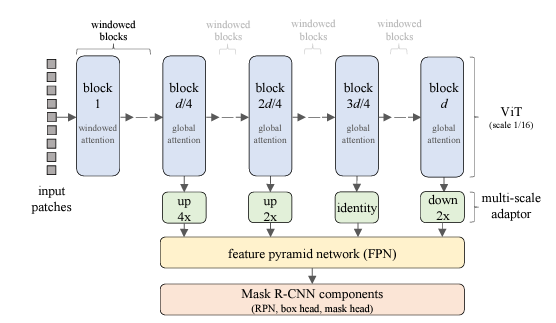


In [10]:
import torchvision

def getmodel(model_name,device):
  if model_name == 'v2':
    model = torchvision.models.detection.fasterrcnn_resnet50_fpn_v2(weights = 'DEFAULT')
  else:
    model = torchvision.models.detection.fasterrcnn_resnet50_fpn(weights = 'DEFAULT')

  model = model.eval().to(device)
  return model

In [11]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = getmodel('v2', device)

Downloading: "https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_v2_coco-dd69338a.pth" to /root/.cache/torch/hub/checkpoints/fasterrcnn_resnet50_fpn_v2_coco-dd69338a.pth
100%|██████████| 167M/167M [00:01<00:00, 132MB/s]


## Load the test data and see the outputs of the data

In [22]:
import os

images = os.listdir(path='data')

## Find the score for each and every image



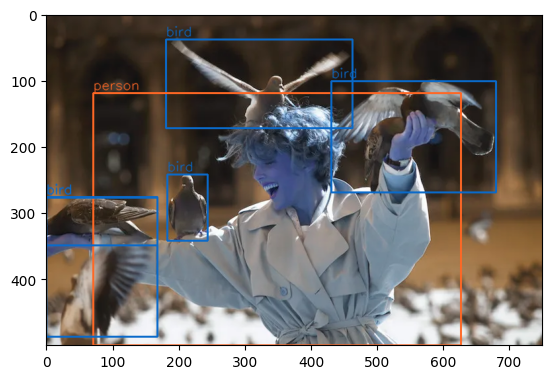

[0.99163264 0.98684955 0.96048325 0.956861   0.9551146  0.71707165
 0.4219123  0.39420438 0.31285587 0.2804595  0.27208397 0.1785229
 0.09395497 0.09278011 0.07883869 0.07558873 0.07477327 0.06729739
 0.06126749]


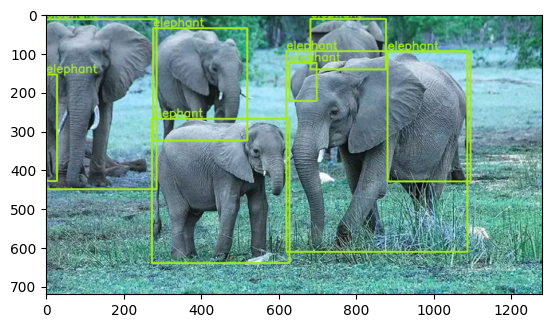

[0.99937767 0.9992034  0.9987362  0.998445   0.9128571  0.8596543
 0.5595831  0.52825236 0.48286313 0.34880596 0.18468753 0.13015816
 0.11030871 0.07646805 0.07028604 0.0577364  0.05730074 0.05607587]


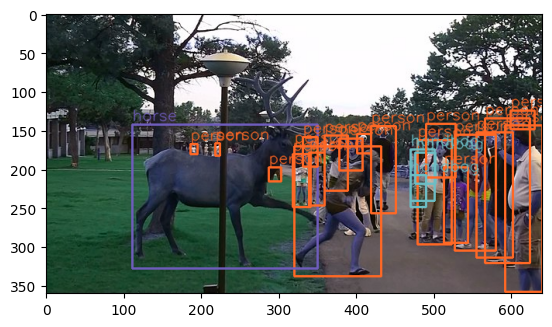

[0.99826753 0.99479645 0.9945351  0.9880299  0.98567873 0.9539498
 0.9324939  0.92931026 0.92818487 0.90811354 0.82146233 0.8151053
 0.78223115 0.7781843  0.74184394 0.736999   0.6604345  0.6561985
 0.6313818  0.6200346  0.61650753 0.6149122  0.55349714 0.4989032
 0.49314973 0.45660836 0.4341849  0.42565817 0.4112709  0.3701368
 0.36201817 0.3617465  0.3495527  0.34078562 0.3048804  0.298885
 0.28729075 0.26905707 0.26731628 0.25699538 0.25660676 0.23691459
 0.22698806 0.21841086 0.21278395 0.20647942 0.20021784 0.19648235
 0.19376038 0.18652819 0.17884389 0.16624388 0.16430219 0.16244216
 0.14657326 0.13882865 0.13608485 0.13591608 0.12833478 0.11392856
 0.10381629 0.08993074 0.08950223 0.0846495  0.07723457 0.07358646
 0.07232642 0.07178847 0.07062133 0.06431142 0.06305466 0.06285375
 0.05663063 0.05661616 0.05625092 0.05573169 0.05368872 0.05167466
 0.05162729 0.05138249]


In [30]:
from PIL import Image
import matplotlib.pyplot as plt

for image_name in images:
  image = Image.open('/content/data/'+image_name).convert('RGB')
  image_bgr = cv.cvtColor(np.array(image), cv.COLOR_RGB2BGR)

  with torch.no_grad():
    boxes, classes, labels, score = predict(image, model, device, 0.5)

  image = draw_boxes(boxes, classes, labels, image_bgr)
  plt.imshow(image)
  plt.show()
  print(score)

More to see

Currently, the Faster R-CNN model has been loaded with the COCO dataset for object detection. Additionally, another model, focusing on segmentation to detection, is available to showcase.